In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
#create a simple tensor
x=torch.tensor([[1,2,3],[4,5,6]])
y=torch.tensor([[7,8,9],[10,11,12]])

sum=x+y
print(sum)
print(sum.device)

tensor([[ 8, 10, 12],
        [14, 16, 18]])
cpu


In [ ]:
#chechking if gpu is avialable
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"


gpu_x=torch.tensor([ [1,2,3],[4,5,6]],device=device)

# Pytorch Pretrained Model - GAN

This notebook is optionally accelerated with a GPU runtime.
If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"
Progressive Growing of GANs (PGAN)
Author: FAIR HDGAN

High-quality image generation of fashion, celebrity faces

In [ ]:
import torch
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)

In [ ]:
#lets generate few images
num_images = 1
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())

**Pytorch Tensor Operations**

In [ ]:
import torch

# Creating a 1D tensor from a Python list
tensor_1d = torch.tensor([1, 2, 3, 4, 5])
print(tensor_1d)

# Creating a 2D tensor (matrix) from a Python list of lists
tensor_2d = torch.tensor([[1, 2], [3, 4]])
print(tensor_2d)

tensor([1, 2, 3, 4, 5])
tensor([[1, 2],
        [3, 4]])


In [ ]:
# Element-wise addition
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])
result = tensor_a + tensor_b
print(result)  # Output: tensor([5, 7, 9])

# Element-wise multiplication
result = tensor_a * tensor_b
print(result)  # Output: tensor([ 4, 10, 18])

# Element-wise division
result = tensor_b / tensor_a
print(result)  # Output: tensor([4., 2.5, 2.])

tensor([5, 7, 9])
tensor([ 4, 10, 18])
tensor([4.0000, 2.5000, 2.0000])


In [ ]:
# Matrix multiplication
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])
result = torch.matmul(matrix_a, matrix_b)
print(result)  # Output: tensor([[19, 22], [43, 50]])

# Transpose of a matrix
result = matrix_a.T
print(result)  # Output: tensor([[1, 3], [2, 4]])

# Dot product of two vectors
vector_a = torch.tensor([1, 2, 3])
vector_b = torch.tensor([4, 5, 6])
result = torch.dot(vector_a, vector_b)
print(result)  # Output: tensor(32)

tensor([[19, 22],
        [43, 50]])
tensor([[1, 3],
        [2, 4]])
tensor(32)


In [ ]:
#Reduction Operations
tensor=torch.tensor([1,2,3,4,5])

#sum of all elements in tensor
sum=torch.sum(tensor)
print(sum)

#Mean of all elemements in tensor
mean=torch.mean(tensor.float())
print(mean)

#Manimum and Minimum Elements in tensor
max=torch.max(tensor)
min=torch.min(tensor)

print("max ",max)
print("min ",min)


tensor(15)
tensor(3.)
max  tensor(5)
min  tensor(1)


In [ ]:
#Reshaping Opertaion

import torch
unshaped_tensor=torch.tensor( [ [1,2,3],
                              [4,5,6] ])

#reshaping 2*3 tensor into 3*2 tensor
reshaped_tensor=unshaped_tensor.view(3,2)
print(reshaped_tensor)


tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [ ]:
#Squeezing Operation
tensor=torch.tensor( [ [  [1,2] ]])
print(tensor.size())

#Squeezing tensor
squeezed_tensor=tensor.squeeze()
print(squeezed_tensor)
print(squeezed_tensor.size())

torch.Size([1, 1, 2])
tensor([1, 2])
torch.Size([2])


In [ ]:
import torch
#UnSqueezing

ten=torch.tensor([1,2,3])
print(ten.shape)

#unsqueeze to make it 2d tensor 1*3
unsqueezed_tensor=ten.unsqueeze(0)
print(unsqueezed_tensor)

print("**** Unsqueezing to make it 2d tensor (3*1) ")

unsqueezed_tensor=ten.unsqueeze(1)
print(unsqueezed_tensor)



torch.Size([3])
tensor([[1, 2, 3]])
**** Unsqueezing to make it 2d tensor (3*1) 
tensor([[1],
        [2],
        [3]])


##Linear Regression using Pytorch

In [ ]:
#libaray used for visalizing a pytorch model

!pip install torchviz

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.randn(100, 1)

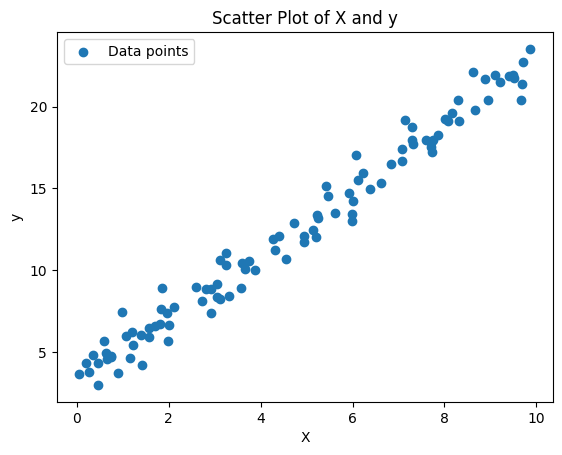

In [ ]:
# Creating the scatter plot
plt.scatter(X, y, label='Data points')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X and y')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
def linear_regression(input_size, output_size):
    return nn.Linear(input_size, output_size)

In [ ]:
input_size = 1
output_size = 1
model = linear_regression(input_size, output_size)


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 1.6616
Epoch [200/1000], Loss: 1.0877
Epoch [300/1000], Loss: 0.8990
Epoch [400/1000], Loss: 0.8370
Epoch [500/1000], Loss: 0.8166
Epoch [600/1000], Loss: 0.8099
Epoch [700/1000], Loss: 0.8077
Epoch [800/1000], Loss: 0.8069
Epoch [900/1000], Loss: 0.8067
Epoch [1000/1000], Loss: 0.8066


In [ ]:
with torch.no_grad():
    print("Learned Parameters:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.data.item():.4f}")


Learned Parameters:
weight: 1.9553
bias: 3.2065


In [ ]:
test_input = torch.tensor([[5.0]], dtype=torch.float32)
predicted_output = model(test_input)
print(f"Input: {test_input.item()}, Predicted Output: {predicted_output.item()}")


Input: 5.0, Predicted Output: 12.982534408569336


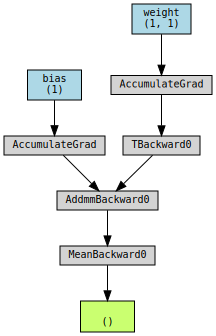

In [ ]:
#visulizing Pytorch model
from torchviz import make_dot

make_dot(predicted_output.mean(), params=dict(model.named_parameters()))

##Exporting Model in onnx fromat to visalize in the Netron APP

In [ ]:
#Exporting to Netron APP
!pip3 install onnx
input_names = ["Regression with curve"]
output_names = ["Regression wih Curve"]

torch.onnx.export(model, y_pred , "model2.onnx", input_names=input_names, output_names=output_names)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



## Plotting a Non Linear Dataset

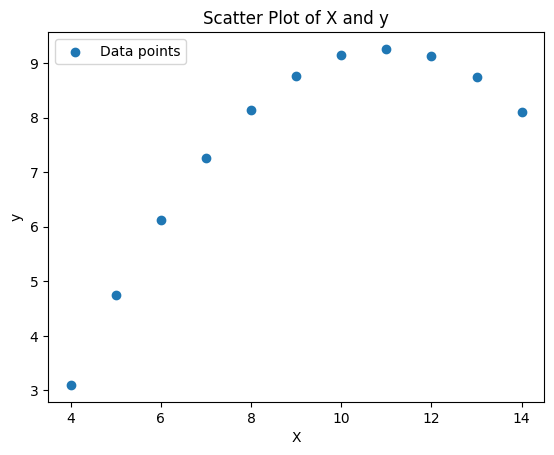

In [ ]:
import matplotlib.pyplot as plt

# this is dataset 2 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
x_values = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y_values = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

# Creating the scatter plot
plt.scatter(x_values, y_values, label='Data points')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X and y')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()



Visualizing Gradient Descet

Epoch [100/1000], Loss: 1.2586
Epoch [200/1000], Loss: 0.9552
Epoch [300/1000], Loss: 0.8554
Epoch [400/1000], Loss: 0.8226
Epoch [500/1000], Loss: 0.8119
Epoch [600/1000], Loss: 0.8083
Epoch [700/1000], Loss: 0.8072
Epoch [800/1000], Loss: 0.8068
Epoch [900/1000], Loss: 0.8066
Epoch [1000/1000], Loss: 0.8066
Learned Parameters:
weight: 1.9553
bias: 3.2067
Input: 5.0, Predicted Output: 12.983263969421387


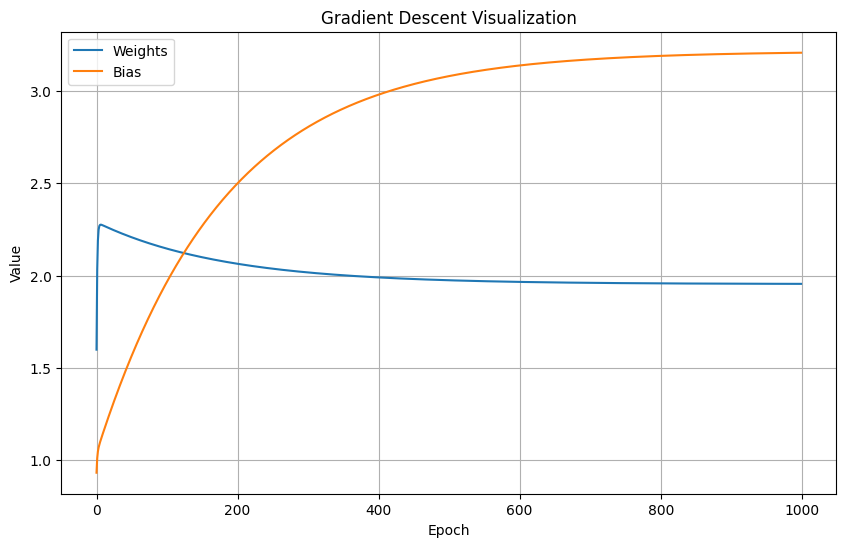

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some toy data for linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.randn(100, 1)

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Initialize the model
model = nn.Linear(1, 1)  # One input feature and one output feature

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model and recording parameter values
num_epochs = 1000
weights = []
bias = []

for epoch in range(num_epochs):
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the model's current weights and bias
    with torch.no_grad():
        weights.append(model.weight.item())
        bias.append(model.bias.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the learned parameters (slope and bias)
with torch.no_grad():
    print("Learned Parameters:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.data.item():.4f}")

# Test the model with a new input
test_input = torch.tensor([[5.0]], dtype=torch.float32)
predicted_output = model(test_input)
print(f"Input: {test_input.item()}, Predicted Output: {predicted_output.item()}")

# Visualize the gradient descent process
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), weights, label='Weights')
plt.plot(range(num_epochs), bias, label='Bias')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Gradient Descent Visualization')
plt.legend()
plt.grid(True)
plt.show()


Epoch [100/1000], Loss: 37.1301
Epoch [200/1000], Loss: 34.3030
Epoch [300/1000], Loss: 34.2304
Epoch [400/1000], Loss: 33.6891
Epoch [500/1000], Loss: 9.9890
Epoch [600/1000], Loss: 4.7761
Epoch [700/1000], Loss: 4.8203
Epoch [800/1000], Loss: 4.1898
Epoch [900/1000], Loss: 3.4850
Epoch [1000/1000], Loss: 1.7189
Learned Parameters:
0.weight: -0.7036
0.bias: 5.7206
2.weight: -2.7962
2.bias: 19.0250
Input: 5.0, Predicted Output: 12.865726470947266


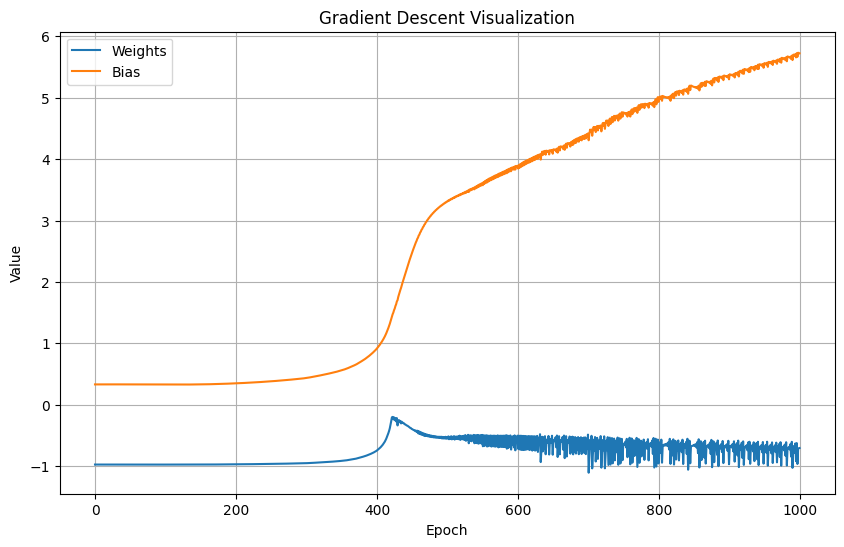

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some toy data for linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.randn(100, 1)

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the Linear Regression model with ReLU activation
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model and recording parameter values
num_epochs = 1000
weights = []
bias = []

for epoch in range(num_epochs):
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the model's current weights and bias
    with torch.no_grad():
        weights.append(model[0].weight.item())
        bias.append(model[0].bias.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the learned parameters (slope and bias)
with torch.no_grad():
    print("Learned Parameters:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.data.item():.4f}")

# Test the model with a new input
test_input = torch.tensor([[5.0]], dtype=torch.float32)
predicted_output = model(test_input)
print(f"Input: {test_input.item()}, Predicted Output: {predicted_output.item()}")

# Visualize the gradient descent process
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), weights, label='Weights')
plt.plot(range(num_epochs), bias, label='Bias')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Gradient Descent Visualization')
plt.legend()
plt.grid(True)
plt.show()


##Non Linear Regression

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *

In [ ]:


# Parameters
num_points = 200
x_range = np.linspace(0, 10, num_points)
noise = np.random.normal(0, 0.3, num_points)

# Generate zigzag points
y = np.sin(x_range) + noise



In [ ]:
# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(x_range, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


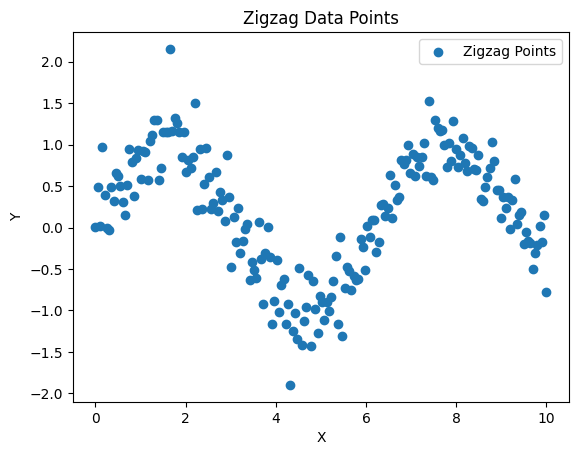

In [ ]:
# Plot the zigzag points
plt.scatter(x_range, y, label='Zigzag Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zigzag Data Points')
plt.legend()
plt.show()

Epoch [100/10000], Loss: 0.4374
Epoch [200/10000], Loss: 0.4084
Epoch [300/10000], Loss: 0.3840
Epoch [400/10000], Loss: 0.3626
Epoch [500/10000], Loss: 0.3444
Epoch [600/10000], Loss: 0.3294
Epoch [700/10000], Loss: 0.3165
Epoch [800/10000], Loss: 0.3052
Epoch [900/10000], Loss: 0.2954
Epoch [1000/10000], Loss: 0.2867
Epoch [1100/10000], Loss: 0.2792
Epoch [1200/10000], Loss: 0.2726
Epoch [1300/10000], Loss: 0.2669
Epoch [1400/10000], Loss: 0.2619
Epoch [1500/10000], Loss: 0.2576
Epoch [1600/10000], Loss: 0.2538
Epoch [1700/10000], Loss: 0.2505
Epoch [1800/10000], Loss: 0.2476
Epoch [1900/10000], Loss: 0.2450
Epoch [2000/10000], Loss: 0.2427
Epoch [2100/10000], Loss: 0.2406
Epoch [2200/10000], Loss: 0.2386
Epoch [2300/10000], Loss: 0.2368
Epoch [2400/10000], Loss: 0.2352
Epoch [2500/10000], Loss: 0.2336
Epoch [2600/10000], Loss: 0.2321
Epoch [2700/10000], Loss: 0.2307
Epoch [2800/10000], Loss: 0.2294
Epoch [2900/10000], Loss: 0.2281
Epoch [3000/10000], Loss: 0.2269
Epoch [3100/10000],

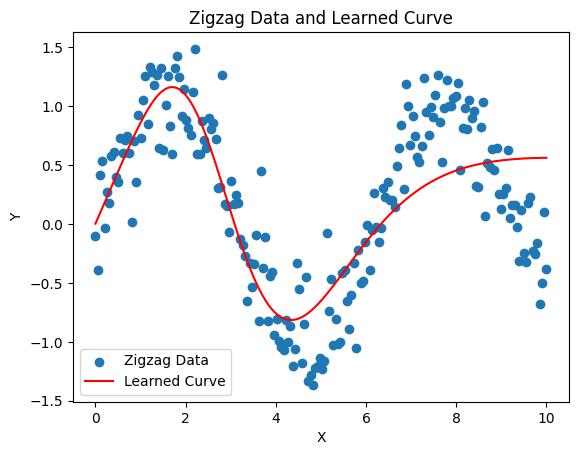

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate zigzag data points
def generate_zigzag_data(num_points):
    x_range = torch.linspace(0, 10, num_points)
    noise = torch.randn(num_points) * 0.3
    y = torch.sin(x_range) + noise
    return x_range, y

num_points = 200
x_data, y_data = generate_zigzag_data(num_points)

# Define a simple neural network using a sequential module
model = nn.Sequential(
    nn.Linear(1, 50),  # Input layer: 1 input feature, 50 neurons
    nn.Tanh(),        # Activation function
    nn.Linear(50, 1)   # Output layer: 50 neurons, 1 output feature
)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    #print(x_data.unsqueeze(1).shape)
    y_pred = model(x_data.unsqueeze(1))
    loss = criterion(y_pred, y_data.unsqueeze(1))

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the original zigzag data and the learned curve
plt.scatter(x_data, y_data, label='Zigzag Data')
with torch.no_grad():
    model.eval()
    y_pred = model(x_data.unsqueeze(1))
    plt.plot(x_data, y_pred, label='Learned Curve', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zigzag Data and Learned Curve')
plt.legend()
plt.show()

In [ ]:
#test_input = torch.tensor([[5.0]], dtype=torch.float32)
predicted_output = model(X_tensor)
#print(f"Input: {test_input.item()}, Predicted Output: {predicted_output.item()}")

In [ ]:
sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=predicted_output.ravel(), color='red', label='Model') #What our model learned

In [ ]:
X.shape

(100, 1)

#Crescent Moon Pytorch Example

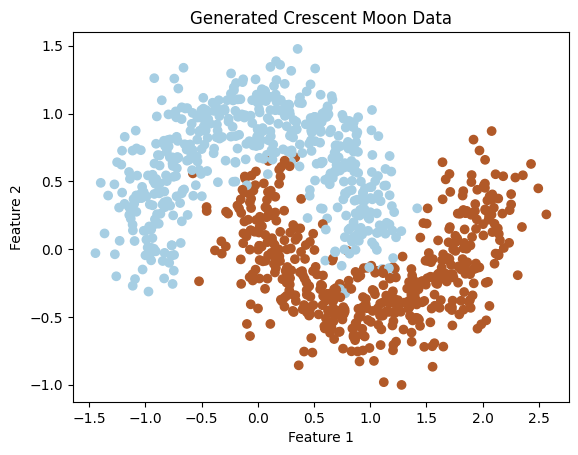

Epoch [0/1000] - Loss: 0.6755
Epoch [100/1000] - Loss: 0.1829
Epoch [200/1000] - Loss: 0.0864
Epoch [300/1000] - Loss: 0.0693
Epoch [400/1000] - Loss: 0.0637
Epoch [500/1000] - Loss: 0.0609
Epoch [600/1000] - Loss: 0.0596
Epoch [700/1000] - Loss: 0.0586
Epoch [800/1000] - Loss: 0.0577
Epoch [900/1000] - Loss: 0.0570
Training Finished


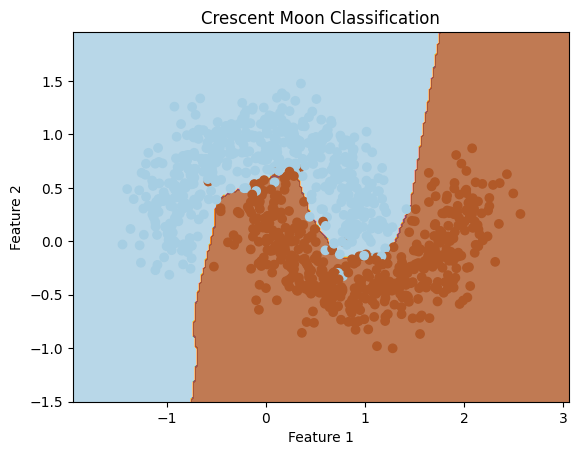

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic crescent moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Generated Crescent Moon Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

# Define a simple neural network architecture
model = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}] - Loss: {loss.item():.4f}")

print("Training Finished")

# Evaluate the model on a grid for visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
model.eval()
with torch.no_grad():
    Z = model(grid_tensor)
    Z = torch.argmax(Z, dim=1)
    Z = Z.numpy()
Z = Z.reshape(xx.shape)

# Plotting the data points and classification boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Crescent Moon Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
